# San Francisco Housing Cost Analysis

In this assignment, you will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.

In [1]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv

import warnings
warnings.filterwarnings('ignore')

In [31]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("MAPBOX_API_KEY")

## Load Data

In [15]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data

neighborhood  sale_price_sqr_foot  housing_units  gross_rent
year                                                                        
2010            Alamo Square           291.182945         372560        1239
2010              Anza Vista           267.932583         372560        1239
2010                 Bayview           170.098665         372560        1239
2010        Buena Vista Park           347.394919         372560        1239
2010        Central Richmond           319.027623         372560        1239
...                      ...                  ...            ...         ...
2016          Telegraph Hill           903.049771         384242        4390
2016              Twin Peaks           970.085470         384242        4390
2016  Van Ness/ Civic Center           552.602567         384242        4390
2016       Visitacion Valley           328.319007         384242        4390
2016           Westwood Park           631.195426         384242        4390

[397 rows x 4 columns]

- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function.

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Use the min, max, and std to scale the y limits of the chart.



In [4]:
# Calculate the mean number of housing units per year (hint: use groupby) 
avg_housing_units_year = sfo_data.groupby('year')['housing_units'].mean()
avg_housing_units_year

year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
2015    382295
2016    384242
Name: housing_units, dtype: int64

In [5]:
# Save the dataframe as a csv file
sfo_data_df = pd.DataFrame(avg_housing_units_year)

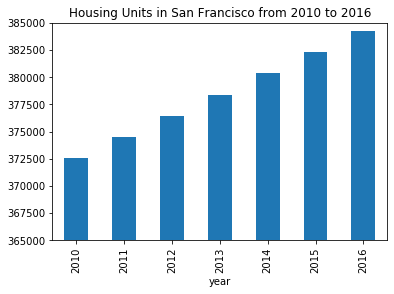

In [6]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
sfo_data.groupby('year')['housing_units'].mean().plot(kind='bar', ylim=(365000,385000), title='Housing Units in San Francisco from 2010 to 2016')

# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
# YOUR CODE HERE!

- - - 

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

In [9]:
# Calculate the average sale price per square foot and average gross rent
avg_sale_sqft = sfo_data.groupby(['year'])['sale_price_sqr_foot'].mean()
avg_gross_rent = sfo_data.groupby(['year'])['gross_rent'].mean()

Text(0, 0.5, 'Price per SqFt')

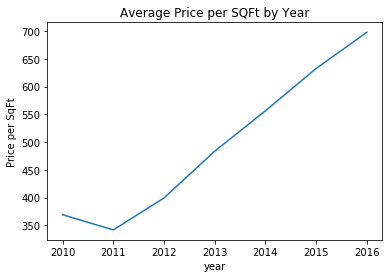

In [11]:
# Create two line charts, one to plot the average sale price per square foot and another for average montly rent

# Line chart for average sale price per square foot
avg_sale_sqft.plot(kind='line', title='Average Price per SQFt by Year').set_ylabel('Price per SqFt')

Text(0, 0.5, 'Price per SqFt')

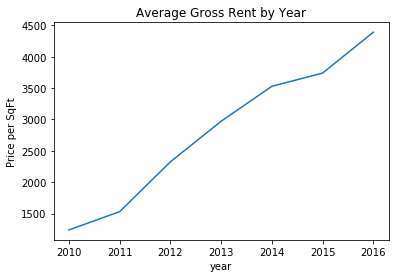

In [12]:
#Line chart for average montly rent
avg_gross_rent.plot(kind='line', title='Average Gross Rent by Year').set_ylabel('Price per SqFt')

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [13]:
# Group by year and neighborhood and then create a new dataframe of the mean values
neighborhood_df = sfo_data.groupby(['year','neighborhood']).mean().reset_index()
neighborhood_df.head(10)

year      neighborhood  sale_price_sqr_foot  housing_units  gross_rent
0  2010      Alamo Square           291.182945         372560        1239
1  2010        Anza Vista           267.932583         372560        1239
2  2010           Bayview           170.098665         372560        1239
3  2010  Buena Vista Park           347.394919         372560        1239
4  2010  Central Richmond           319.027623         372560        1239
5  2010    Central Sunset           418.172493         372560        1239
6  2010    Corona Heights           369.359338         372560        1239
7  2010        Cow Hollow           569.379968         372560        1239
8  2010     Croker Amazon           165.645730         372560        1239
9  2010   Diamond Heights           456.930822         372560        1239

In [20]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
neighborhood_df.hvplot(
                       x='year',
                       y='sale_price_sqr_foot', 
                       xlabel='Year',
                       ylabel='Avg. Sales Price per Square Foot', 
                       groupby='neighborhood')

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [21]:
# Use hvplot to create an interactive line chart of the average monthly rent.
# The plot should have a dropdown selector for the neighborhood
neighborhood_df.hvplot(
                       x='year',
                       y='gross_rent', 
                       xlabel='Year',
                       ylabel='Avg. Gross Rent per year', 
                       groupby='neighborhood')

:DynamicMap   [neighborhood]
   :Curve   [year]   (gross_rent)

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [22]:
# Getting the data from the top 10 expensive neighborhoods to own
avg_values_neighborhood = neighborhood_df.drop(columns=['year']).groupby('neighborhood').mean().round(2)
expensivest_neighborhoods = avg_values_neighborhood.sort_values("sale_price_sqr_foot", ascending = False).head(10)

expensivest_neighborhoods

sale_price_sqr_foot  housing_units  gross_rent
neighborhood                                                         
Union Square District               903.99      377427.50     2555.17
Merced Heights                      788.84      380348.00     3414.00
Miraloma Park                       779.81      375967.25     2155.25
Pacific Heights                     689.56      378401.00     2817.29
Westwood Park                       687.09      382295.00     3959.00
Telegraph Hill                      676.51      378401.00     2817.29
Presidio Heights                    675.35      378401.00     2817.29
Cow Hollow                          665.96      378401.00     2817.29
Potrero Hill                        662.01      378401.00     2817.29
South Beach                         650.12      375805.00     2099.00

In [37]:
# Plotting the data from the top 10 expensive neighborhoods
expensivest_neighborhoods['sale_price_sqr_foot'].hvplot.bar(label='Top 10 Expensive Neighborhoods in SFO',
                                                           xlabel='Neighborhood',
                                                           ylabel='Avg. Sales Price per Square Foot',
                                                           height=400,
                                                           rot=90)

:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

In [24]:
# Fetch original dataframe grouped by year and neighborhood
neighborhood_df.head(10)

year      neighborhood  sale_price_sqr_foot  housing_units  gross_rent
0  2010      Alamo Square           291.182945         372560        1239
1  2010        Anza Vista           267.932583         372560        1239
2  2010           Bayview           170.098665         372560        1239
3  2010  Buena Vista Park           347.394919         372560        1239
4  2010  Central Richmond           319.027623         372560        1239
5  2010    Central Sunset           418.172493         372560        1239
6  2010    Corona Heights           369.359338         372560        1239
7  2010        Cow Hollow           569.379968         372560        1239
8  2010     Croker Amazon           165.645730         372560        1239
9  2010   Diamond Heights           456.930822         372560        1239

In [44]:
# Plotting the data from the top 10 expensive neighborhoods
multi_group = sfo_data.groupby(['year','neighborhood']).mean()
multi_group

sale_price_sqr_foot  housing_units  gross_rent
year neighborhood                                                          
2010 Alamo Square                     291.182945         372560        1239
     Anza Vista                       267.932583         372560        1239
     Bayview                          170.098665         372560        1239
     Buena Vista Park                 347.394919         372560        1239
     Central Richmond                 319.027623         372560        1239
...                                          ...            ...         ...
2016 Telegraph Hill                   903.049771         384242        4390
     Twin Peaks                       970.085470         384242        4390
     Van Ness/ Civic Center           552.602567         384242        4390
     Visitacion Valley                328.319007         384242        4390
     Westwood Park                    631.195426         384242        4390

[397 rows x 3 columns]

In [56]:
multi_group['gross_rent'].hvplot.bar(label='Top 10 Expensive Neighborhoods in SFO',
                                                           xlabel='Neighborhood',
                                                           ylabel='Num. Housing Units',
                                                            groupby = 'neighborhood',
                                                           height=400,
                                                           rot=90) * multi_group['sale_price_sqr_foot'].hvplot.bar(label='Top 10 Expensive Neighborhoods in SFO')

ValueError: Buffer has wrong number of dimensions (expected 1, got 2)

:DynamicMap   [neighborhood]
   :Overlay
      .Bars.Top_10_Expensive_Neighborhoods_in_SFO.I  :Bars   [year,neighborhood]   (gross_rent)
      .Bars.Top_10_Expensive_Neighborhoods_in_SFO.II :Bars   [year,neighborhood]   (sale_price_sqr_foot)

- - - 

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [25]:
# Load neighborhoods coordinates data
file_path = Path("Data/neighborhoods_coordinates.csv")
neighborhood_locations_df = pd.read_csv(file_path)
neighborhood_locations_df.head()

Neighborhood        Lat         Lon
0     Alamo Square  37.791012 -122.402100
1       Anza Vista  37.779598 -122.443451
2          Bayview  37.734670 -122.401060
3  Bayview Heights  37.728740 -122.410980
4   Bernal Heights  37.728630 -122.443050

### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [26]:
# Calculate the mean values for each neighborhood
avg_values_neighborhood=avg_values_neighborhood.reset_index().rename(columns = {'neighborhood':'Neighborhood'})
avg_values_neighborhood.head()

Neighborhood  sale_price_sqr_foot  housing_units  gross_rent
0     Alamo Square               366.02       378401.0     2817.29
1       Anza Vista               373.38       379050.0     3031.83
2          Bayview               204.59       376454.0     2318.40
3  Bayview Heights               590.79       382295.0     3739.00
4  Bernal Heights                576.75       379374.5     3080.33

In [27]:
# Join the average values with the neighborhood locations
neighborhood_df=pd.merge(neighborhood_locations_df,avg_values_neighborhood, on='Neighborhood')
neighborhood_df.head()

Neighborhood        Lat         Lon  sale_price_sqr_foot  \
0      Alamo Square  37.791012 -122.402100               366.02   
1        Anza Vista  37.779598 -122.443451               373.38   
2           Bayview  37.734670 -122.401060               204.59   
3   Bayview Heights  37.728740 -122.410980               590.79   
4  Buena Vista Park  37.768160 -122.439330               452.68   

   housing_units  gross_rent  
0       378401.0     2817.29  
1       379050.0     3031.83  
2       376454.0     2318.40  
3       382295.0     3739.00  
4       378076.5     2698.83

### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

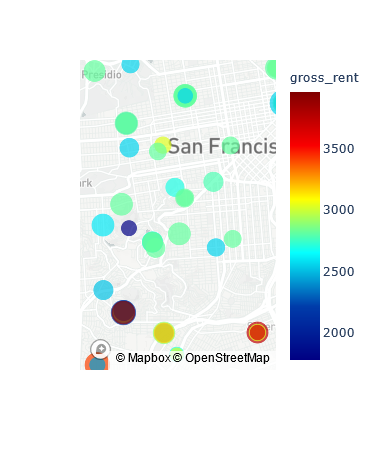

In [32]:
# Set the mapbox access token
px.set_mapbox_access_token(map_box_api)

# Create a scatter mapbox to analyze neighborhood info
px.scatter_mapbox(neighborhood_df,
                  lat="Lat",
                  lon="Lon",
                  size='sale_price_sqr_foot', 
                  color='gross_rent',
                  zoom=11,
                  hover_name='Neighborhood',
                  color_continuous_scale=px.colors.sequential.Jet
                 )

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods. 

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [20]:
# Fetch the data from all expensive neighborhoods per year.
df_expensive_neighborhoods_per_year = df_costs[df_costs["neighborhood"].isin(df_expensive_neighborhoods["neighborhood"])]
df_expensive_neighborhoods_per_year.head()

year      neighborhood  sale_price_sqr_foot  housing_units  gross_rent
7   2010        Cow Hollow           569.379968         372560        1239
31  2010     Miraloma Park           680.608729         372560        1239
41  2010   Pacific Heights           496.516014         372560        1239
46  2010      Potrero Hill           491.450004         372560        1239
47  2010  Presidio Heights           549.417931         372560        1239

### Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year


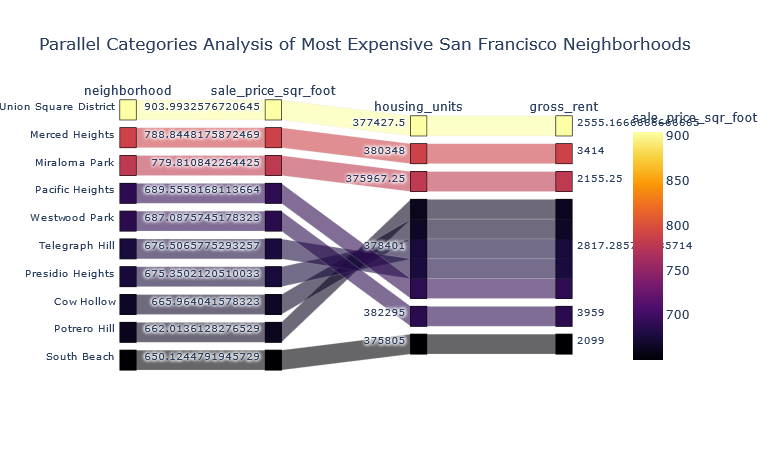

In [21]:
# Parallel Categories Plot
# YOUR CODE HERE!

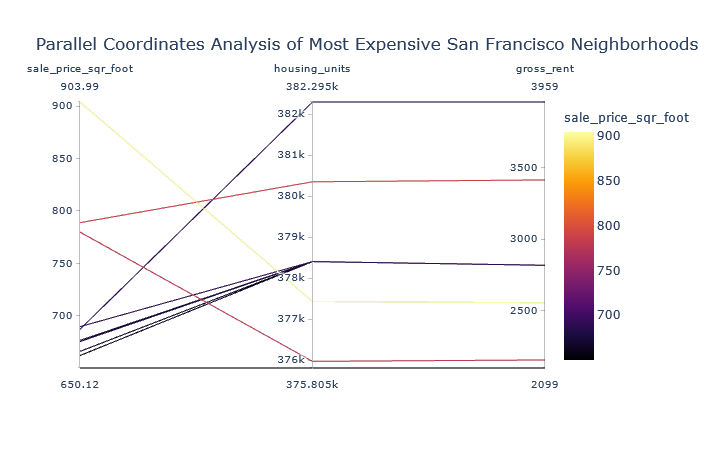

In [22]:
# Parallel Coordinates Plot
# YOUR CODE HERE!

### Create a sunburst chart to conduct a costs analysis of most expensive neighborhoods in San Francisco per year

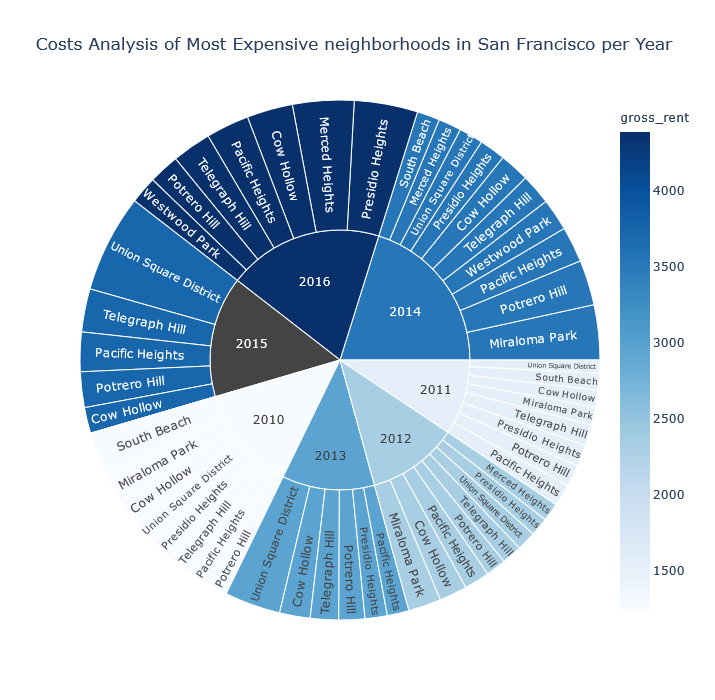

In [23]:
# Sunburst Plot
# YOUR CODE HERE!